# 1주차 심화과제
# MNIST 예측 모델에 deep learning techniques 적용하기


In [2]:
import torch
import torchvision
import torchvision.transforms as transforms


- CIFAR10의 입력 shape 확인
 - CIFAR10은 MNIST와 다른 입력 shape을 가지고 있습니다.
 - 입력 shape은 model을 선언할 때 중요하기 때문에 MNIST 실습 자료에서 사용한 방식과 똑같이 shape을 확인해주시면 됩니다.

- Dataset 및 activation 함수 변경
    - Dataset을 MNIST에서 [CIFAR10](https://pytorch.org/vision/stable/generated/torchvision.datasets.CIFAR10.html)으로 변경해줍니다.
    - Activation 함수를 `nn.ReLU`에서 `nn.LeakyReLU`로 변경해줍니다.
    - 학습 인자는 `n_epochs` = 50, `batch_size` = 256로 설정합니다.



In [3]:
transform = transforms.ToTensor()

# MNIST에서 CIFAR10으로 변경
trainset = torchvision.datasets.CIFAR10(
    root='./data',
    train=True,
    download=True,
    transform=transform
)

testset = torchvision.datasets.CIFAR10(
    root='./data',
    train=False,
    download=True,
    transform=transform
)

100%|██████████| 170498071/170498071 [00:18<00:00, 9181014.38it/s]


Extracting ./data/cifar-10-python.tar.gz to ./data
Files already downloaded and verified


50000
torch.Size([3, 32, 32]) 6


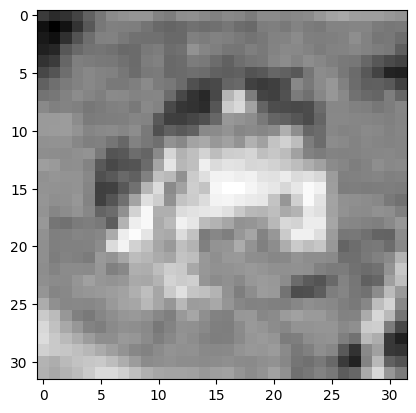

In [4]:
from matplotlib import pyplot as plt


print(len(trainset))
print(trainset[0][0].shape, trainset[0][1])
plt.imshow(trainset[0][0][0], cmap='gray')

In [5]:
batch_size = 256

trainloader = torch.utils.data.DataLoader(
    trainset,
    batch_size=batch_size,
    shuffle=True
)

# shuffle False 적용
testloader = torch.utils.data.DataLoader(
    testset,
    batch_size=batch_size,
    shuffle=False
)

# 심화과제 - plot1
- SGD와 Adam 성능 비교
 - 먼저 [Adam optimizer](https://pytorch.org/docs/stable/generated/torch.optim.Adam.html)을 사용하여 학습하는 코드를 구현합니다.
 - (Plot 1) SGD와 Adam을 학습시킨 후 각각의 epoch에 대한 train 정확도를 plot합니다.

In [ ]:
from torch import nn


class Model(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)

    #nn.ReLU에서 nn.LeakyReLU로 변경
    self.act = nn.LeakyReLU()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


model1 = Model(32 * 32 * 3, 128)
model2 = Model(32 * 32 * 3, 128)

In [ ]:
from torch.optim import SGD,Adam

lr = 0.001

model1 = model1.to('cuda')
model2 = model2.to('cuda')

optimizer_sgd = SGD(model1.parameters(), lr=lr)
optimizer_adam = Adam(model2.parameters(), lr=lr)

Epoch   0 | SGD Accuracy: 0.1444 | Adam Accuracy: 0.3699
Epoch   1 | SGD Accuracy: 0.1463 | Adam Accuracy: 0.4020
Epoch   2 | SGD Accuracy: 0.1538 | Adam Accuracy: 0.4226
Epoch   3 | SGD Accuracy: 0.1587 | Adam Accuracy: 0.4443
Epoch   4 | SGD Accuracy: 0.1609 | Adam Accuracy: 0.4748
Epoch   5 | SGD Accuracy: 0.1686 | Adam Accuracy: 0.4816
Epoch   6 | SGD Accuracy: 0.1735 | Adam Accuracy: 0.4932
Epoch   7 | SGD Accuracy: 0.1848 | Adam Accuracy: 0.5015
Epoch   8 | SGD Accuracy: 0.1957 | Adam Accuracy: 0.5167
Epoch   9 | SGD Accuracy: 0.2096 | Adam Accuracy: 0.5281
Epoch  10 | SGD Accuracy: 0.2203 | Adam Accuracy: 0.5293
Epoch  11 | SGD Accuracy: 0.2306 | Adam Accuracy: 0.5224
Epoch  12 | SGD Accuracy: 0.2360 | Adam Accuracy: 0.5306
Epoch  13 | SGD Accuracy: 0.2433 | Adam Accuracy: 0.5385
Epoch  14 | SGD Accuracy: 0.2467 | Adam Accuracy: 0.5390
Epoch  15 | SGD Accuracy: 0.2483 | Adam Accuracy: 0.5509
Epoch  16 | SGD Accuracy: 0.2493 | Adam Accuracy: 0.5420
Epoch  17 | SGD Accuracy: 0.254

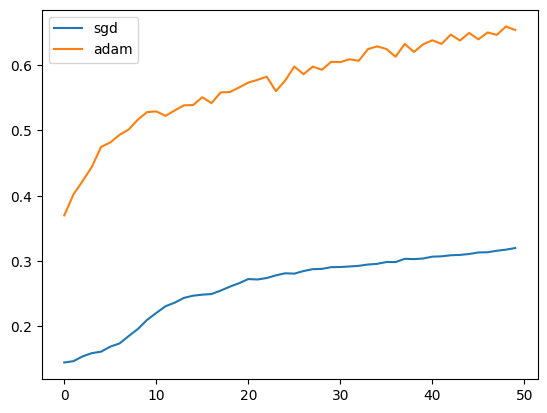

In [ ]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='sgd', label2='adam'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs_sgd = []
train_accs_adam = []

for epoch in range(n_epochs):
  total_train_loss_sgd = 0.
  total_train_loss_adam = 0.

  train_loss = nn.CrossEntropyLoss()

  for data in trainloader:

    # SGD 모델 학습
    model1.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model1(inputs)
    loss = train_loss(preds, labels)
    loss.backward()
    optimizer_sgd.step()
    total_train_loss_sgd += loss.item()

    # Adam 모델 학습
    model2.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model2(inputs)
    loss = train_loss(preds, labels)
    loss.backward()
    optimizer_adam.step()
    total_train_loss_adam += loss.item()

  acc_sgd = accuracy(model1, trainloader)
  acc_adam = accuracy(model2, trainloader)

  train_accs_sgd.append(acc_sgd)
  train_accs_adam.append(acc_adam)


  print(f"Epoch {epoch:3d} | SGD Accuracy: {acc_sgd:.4f} | Adam Accuracy: {acc_adam:.4f}")

plot_acc(train_accs_sgd, train_accs_adam)



#심화 과제 - plot2

- [ ]  Leaky ReLU와 Sigmoid 성능 비교
    - Activation 함수가 `nn.Sigmoid`인 class를 새로 정의합니다.
    - (Plot 2) Adam optimizer를 가지고 sigmoid와 leaky ReLU 모델들을 학습한 후, epoch에 따른 train 정확도를 비교합니다.

In [ ]:
from torch import nn


class Model2(nn.Module):
  def __init__(self, input_dim, n_dim,act_type):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    self.act_type = act_type

    #구분값에 따라 Leaky ReLU와 Sigmoid 선택
    if  act_type == 'l':
      self.act = nn.LeakyReLU()
    else:
      self.act = nn.Sigmoid()

  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.act(self.layer2(x))
    x = self.layer3(x)

    return x


model1 = Model2(32 * 32 * 3, 128,'l')
model2 = Model2(32 * 32 * 3, 128,'s')

In [ ]:
from torch.optim import SGD,Adam

lr = 0.001

model1 = model1.to('cuda')
model2 = model2.to('cuda')
# Leaky ReLU와 Sigmoid optimizer adam으로 설정
optimizer_lr = Adam(model1.parameters(), lr=lr)
optimizer_sm = Adam(model2.parameters(), lr=lr)

Epoch   0 | LeakyReLU Accuracy: 37.5380% | Sigmoid Accuracy: 32.0400%
Epoch   0 | LeakyReLU Loss: 0.7462% | Sigmoid Loss: 0.7947%
Epoch   1 | LeakyReLU Accuracy: 41.2000% | Sigmoid Accuracy: 36.8400%
Epoch   1 | LeakyReLU Loss: 0.6655% | Sigmoid Loss: 0.7096%
Epoch   2 | LeakyReLU Accuracy: 43.1060% | Sigmoid Accuracy: 39.5880%
Epoch   2 | LeakyReLU Loss: 0.6353% | Sigmoid Loss: 0.6770%
Epoch   3 | LeakyReLU Accuracy: 44.2440% | Sigmoid Accuracy: 41.5600%
Epoch   3 | LeakyReLU Loss: 0.6122% | Sigmoid Loss: 0.6537%
Epoch   4 | LeakyReLU Accuracy: 46.9620% | Sigmoid Accuracy: 43.4320%
Epoch   4 | LeakyReLU Loss: 0.5953% | Sigmoid Loss: 0.6326%
Epoch   5 | LeakyReLU Accuracy: 46.7900% | Sigmoid Accuracy: 44.7540%
Epoch   5 | LeakyReLU Loss: 0.5830% | Sigmoid Loss: 0.6191%
Epoch   6 | LeakyReLU Accuracy: 48.1680% | Sigmoid Accuracy: 45.4600%
Epoch   6 | LeakyReLU Loss: 0.5730% | Sigmoid Loss: 0.6047%
Epoch   7 | LeakyReLU Accuracy: 49.4280% | Sigmoid Accuracy: 45.3040%
Epoch   7 | LeakyReL

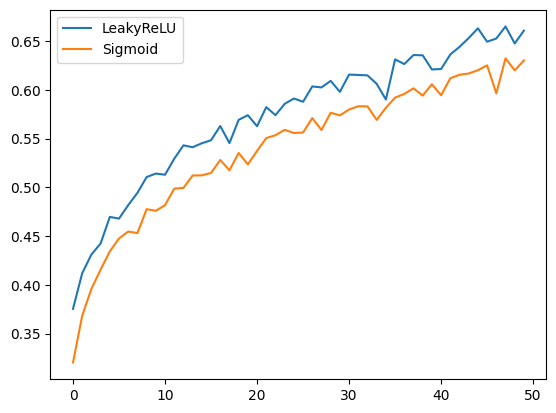

In [ ]:
import numpy as np

def accuracy2(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc2(train_accs, test_accs, label1='LeakyReLU', label2='Sigmoid'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs_lr = []
train_accs_sm = []

for epoch in range(n_epochs):
  total_train_loss_lr = 0.
  total_train_loss_sm = 0.

  train_loss = nn.CrossEntropyLoss()
  for data in trainloader:

    # Leaky ReLU
    model1.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model1(inputs)
    loss = train_loss(preds, labels)
    loss.backward()
    optimizer_lr.step()
    total_train_loss_lr += loss.item()

    # Sigmoid
    model2.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model2(inputs)
    loss = train_loss(preds, labels)
    loss.backward()
    optimizer_sm.step()
    total_train_loss_sm += loss.item()



  lr_acc = accuracy2(model1, trainloader)
  sm_acc = accuracy2(model2, trainloader)

  train_accs_lr.append(lr_acc)
  train_accs_sm.append(sm_acc)


  print(f"Epoch {epoch:3d} | LeakyReLU Accuracy: {lr_acc * 100 :.4f}% | Sigmoid Accuracy: {sm_acc * 100:.4f}%")
  print(f"Epoch {epoch:3d} | LeakyReLU Loss: {total_train_loss_lr / len(trainloader.dataset)*100  :.4f}% | Sigmoid Loss: {total_train_loss_sm / len(trainloader.dataset)*100:.4f}%")

plot_acc2(train_accs_lr, train_accs_sm)



#심화 과제 - plot3

- Dropout을 적용한 이후의 generalization error 확인
    - PyTorch [dropout](https://pytorch.org/docs/stable/generated/torch.nn.Dropout.html)을 leaky ReLU를 사용하는 MLP의 모든 layer에 적용한 class를 새로 정의합니다. Dropout 확률은 0.1로 설정합니다.
    - 학습 코드에서 다음 부분들을 추가해줍니다:
        - `model.train()`을 `for data in trainloader:` 이전 줄에 둡니다.
        - `trainloader`와 `testloader`에 대한 정확도를 계산하는 코드를 다음과 같이 변경합니다:
            
            ```python
            with torch.no_grad():
              model.eval()
              <기존 정확도 계산 코드>
            ```
            
    - (Plot 3) Adam optimizer를 가지고 dropout을 적용한 모델을 학습한 후, epoch에 따른 train과 test 정확도를 비교합니다.

In [6]:
from torch import nn


class Model3(nn.Module):
  def __init__(self, input_dim, n_dim):
    super().__init__()

    self.layer1 = nn.Linear(input_dim, n_dim)
    self.layer2 = nn.Linear(n_dim, n_dim)
    self.layer3 = nn.Linear(n_dim, 10)
    self.act = nn.LeakyReLU()
    # dropout 설정
    self.dropout = nn.Dropout(0.1)


  def forward(self, x):
    x = torch.flatten(x, start_dim=1)
    x = self.act(self.layer1(x))
    x = self.dropout(x)
    x = self.act(self.layer2(x))
    x = self.dropout(x)
    x = self.layer3(x)

    return x


model = Model3(32 * 32 * 3, 128)

In [7]:
from torch.optim import SGD,Adam

lr = 0.001

model = model.to('cuda')
# adam으로 설정
optimizer = Adam(model.parameters(), lr=lr)

Epoch   0 | Train Accuracy: 35.0620% | Test Accuracy: 35.8900%
Epoch   0 | Train Loss: 0.7503% | Test Loss: 0.1406%
Epoch   1 | Train Accuracy: 40.3360% | Test Accuracy: 41.8600%
Epoch   1 | Train Loss: 0.6814% | Test Loss: 0.1308%
Epoch   2 | Train Accuracy: 43.3180% | Test Accuracy: 44.5700%
Epoch   2 | Train Loss: 0.6507% | Test Loss: 0.1251%
Epoch   3 | Train Accuracy: 43.3180% | Test Accuracy: 44.4200%
Epoch   3 | Train Loss: 0.6327% | Test Loss: 0.1250%
Epoch   4 | Train Accuracy: 44.5640% | Test Accuracy: 45.5300%
Epoch   4 | Train Loss: 0.6187% | Test Loss: 0.1229%
Epoch   5 | Train Accuracy: 46.3380% | Test Accuracy: 47.1200%
Epoch   5 | Train Loss: 0.6082% | Test Loss: 0.1198%
Epoch   6 | Train Accuracy: 46.2680% | Test Accuracy: 46.9100%
Epoch   6 | Train Loss: 0.5974% | Test Loss: 0.1186%
Epoch   7 | Train Accuracy: 47.3560% | Test Accuracy: 48.0400%
Epoch   7 | Train Loss: 0.5909% | Test Loss: 0.1176%
Epoch   8 | Train Accuracy: 48.1860% | Test Accuracy: 48.8900%
Epoch   8

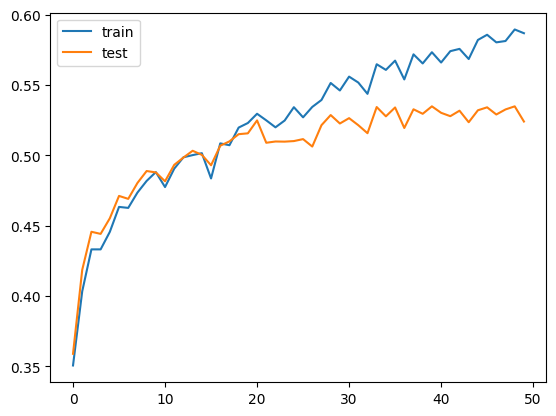

In [8]:
import numpy as np

def accuracy(model, dataloader):
  cnt = 0
  acc = 0

  for data in dataloader:
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')

    preds = model(inputs)
    preds = torch.argmax(preds, dim=-1)

    cnt += labels.shape[0]
    acc += (labels == preds).sum().item()

  return acc / cnt

def plot_acc(train_accs, test_accs, label1='train', label2='test'):
  x = np.arange(len(train_accs))

  plt.plot(x, train_accs, label=label1)
  plt.plot(x, test_accs, label=label2)
  plt.legend()
  plt.show()


n_epochs = 50
train_accs = []
test_accs = []

for epoch in range(n_epochs):
  total_train_loss = 0.
  total_test_loss = 0.
  train_loss = 0.
  test_loss = 0.

  model.train()

  train_loss = nn.CrossEntropyLoss()
  for data in trainloader:
    # train
    model.zero_grad()
    inputs, labels = data
    inputs, labels = inputs.to('cuda'), labels.to('cuda')
    preds = model(inputs)
    loss = train_loss(preds, labels)
    loss.backward()
    optimizer.step()
    total_train_loss += loss.item()

  train_accuracy = accuracy(model, trainloader)
  train_accs.append(train_accuracy)

  with torch.no_grad():
    model.eval()
    test_loss = nn.CrossEntropyLoss()
    for data in testloader:
      # test
      inputs, labels = data
      inputs, labels = inputs.to('cuda'), labels.to('cuda')
      preds = model(inputs)
      loss = test_loss(preds, labels)

      total_test_loss += loss.item()

    test_accuracy = accuracy(model, testloader)
    test_accs.append(test_accuracy)


  print(f"Epoch {epoch:3d} | Train Accuracy: {train_accuracy * 100 :.4f}% | Test Accuracy: {test_accuracy * 100:.4f}%")
  print(f"Epoch {epoch:3d} | Train Loss: {total_train_loss / len(trainloader.dataset)*100  :.4f}% | Test Loss: {total_test_loss / len(trainloader.dataset)*100:.4f}%")

plot_acc(train_accs, test_accs)

